# Tutorial on simulating from model

In this tutorial we see how to simulate from the model

In [1]:
import numpy as np
import pandas as pd
import numba
import seaborn as sns
import matplotlib as plt
from progress_patients import * #This one is our file open it to see the functions as they are constructed

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/42/2kdf45dd1qz5n7kf9lm8ld9r0000gn/T/ipykernel_89615/1589698071.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


### Simulate one trajectory
In this case we assume we have a fixed registry of `new_arrivals` and `weights` as well as given `initial_colonized` cases. 

In [2]:
#Random seed
np.random.seed(3245)

nsim = 1        #Number of simulations
num_obs = 7     #Number of patients
num_days = 20  #Run model by 100 days
num_wards = 4   #Total number of wards

#DATA INPUTS (made-up for this example)
#----------------------------------------------------------------
#Simulate the initial number of cases
initial_colonized = np.random.binomial(n=1,p=0.4,size=num_obs) == 1

#Construct a matrix for new arrivals with each row being a different day
new_arrivals = np.empty((num_days, num_obs))

#Simulate the ward-indicator variable
wards = np.empty((num_days, num_obs))

#Simulate the total number of patients per ward
total_patients_per_ward = np.empty((0, 3), dtype = "int")

for day in range(num_days):

    #Generate the data
    new_arrivals_temp = np.random.binomial(n=1,p=0.05,size=7)
    new_arrivals[day,:] = new_arrivals_temp

    wards[day,:] = np.random.randint(1, 4, size = 7)

    minward = 20
    maxward = minward + 25
    total_patients_per_ward_temp = np.random.randint(minward, maxward, size = num_wards)
    total_patients_per_ward_temp = np.column_stack((np.repeat(day, num_wards),
            total_patients_per_ward_temp, np.arange(1, num_wards + 1)))
    total_patients_per_ward = np.append(total_patients_per_ward, total_patients_per_ward_temp, axis = 0)

#Create weights
weights = np.tile(1, new_arrivals.shape)

#PARAMETERS
#----------------------------------------------------------------
#Create the parameters
parameters = numba.typed.Dict() 
parameters["alpha"] = np.array([0.1])
parameters["beta"] = np.array([0.4])
parameters["gamma"] = np.array([0.5])

#RUN MODEL
#----------------------------------------------------------------
#Colonize nextstep
model_simulation = simulate_discrete_model(initial_colonized, wards, total_patients_per_ward, parameters, nsim,
                                            new_arrivals, weights, progress_patients_1_timestep,
                                            progress_patients_probability_ward_1_timestep)

<Axes: xlabel='day', ylabel='colonized'>

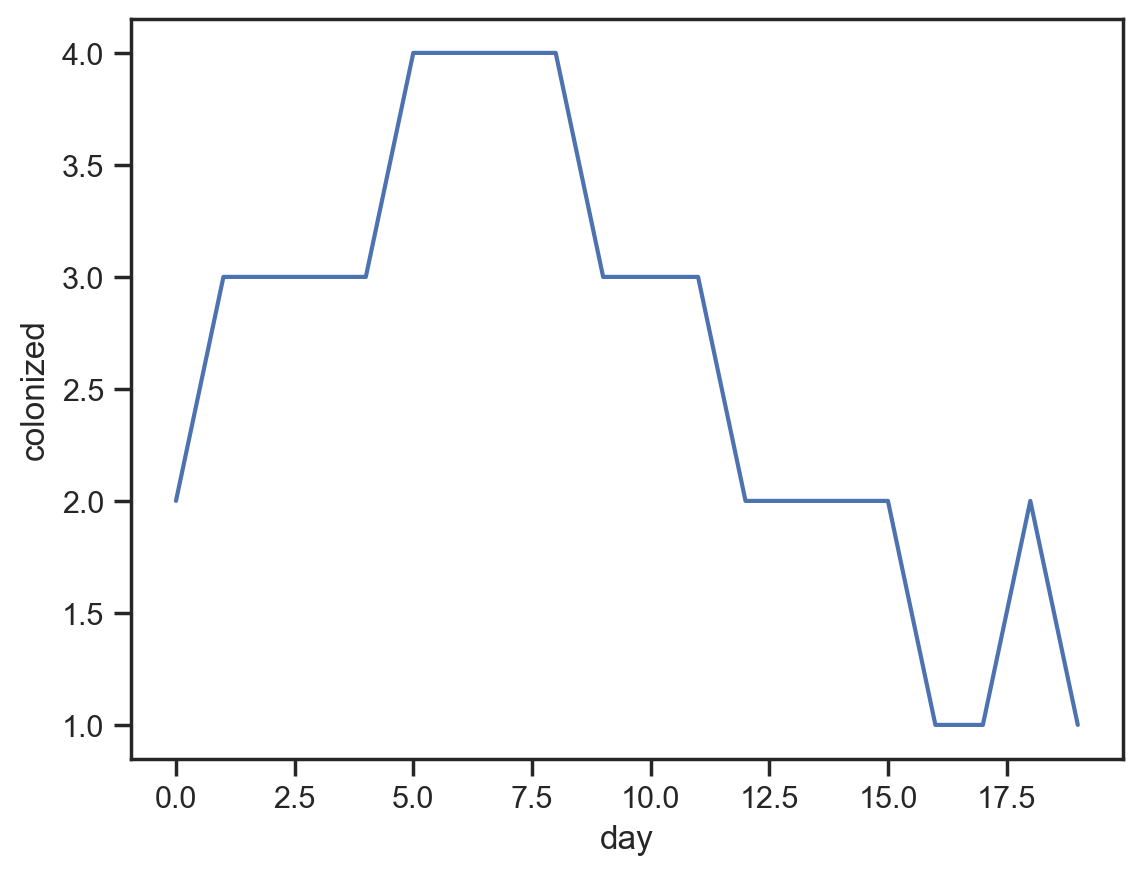

In [3]:
#We can plot the simulation by calculating the total positives and then plotting
total_positive = get_totals(model_simulation)
sns.lineplot(data = total_positive, x = "day", y = "colonized")

## Simulate multiple trajectories with same parameters
In this section we repeat the excercise but now simulating in parallel 100 trajectories

In [4]:
#Random seed
np.random.seed(3245)

nsim = 100      #Number of simulations #<---- THIS IS THE CHANGE
num_obs = 7     #Number of patients
num_days = 100  #Run model by 100 days
num_wards = 4   #Total number of wards

#DATA INPUTS (made-up for this example)
#----------------------------------------------------------------
#Simulate the initial number of cases
initial_colonized = np.random.binomial(n=1,p=0.4,size=num_obs) == 1

#Construct a matrix for new arrivals with each row being a different day
new_arrivals = np.empty((num_days, num_obs))

#Simulate the ward-indicator variable
wards = np.empty((num_days, num_obs))

#Simulate the total number of patients per ward
total_patients_per_ward = np.empty((0, 3), dtype = "int")

for day in range(num_days):

    #Generate the data
    new_arrivals_temp = np.random.binomial(n=1,p=0.05,size=7)
    new_arrivals[day,:] = new_arrivals_temp

    wards[day,:] = np.random.randint(1, 4, size = 7)

    minward = 20
    maxward = minward + 25
    total_patients_per_ward_temp = np.random.randint(minward, maxward, size = num_wards)
    total_patients_per_ward_temp = np.column_stack((np.repeat(day, num_wards),
            total_patients_per_ward_temp, np.arange(1, num_wards + 1)))
    total_patients_per_ward = np.append(total_patients_per_ward, total_patients_per_ward_temp, axis = 0)

#Create weights
weights = np.tile(1, new_arrivals.shape)

#PARAMETERS
#----------------------------------------------------------------
#Create the parameters
parameters = numba.typed.Dict() 
parameters["alpha"] = np.array([0.1])
parameters["beta"] = np.array([0.4])
parameters["gamma"] = np.array([0.5])

#RUN MODEL
#----------------------------------------------------------------
#Colonize nextstep
model_simulation = simulate_discrete_model(initial_colonized, wards, total_patients_per_ward, parameters, nsim,
                                            new_arrivals, weights, progress_patients_1_timestep,
                                            progress_patients_probability_ward_1_timestep)

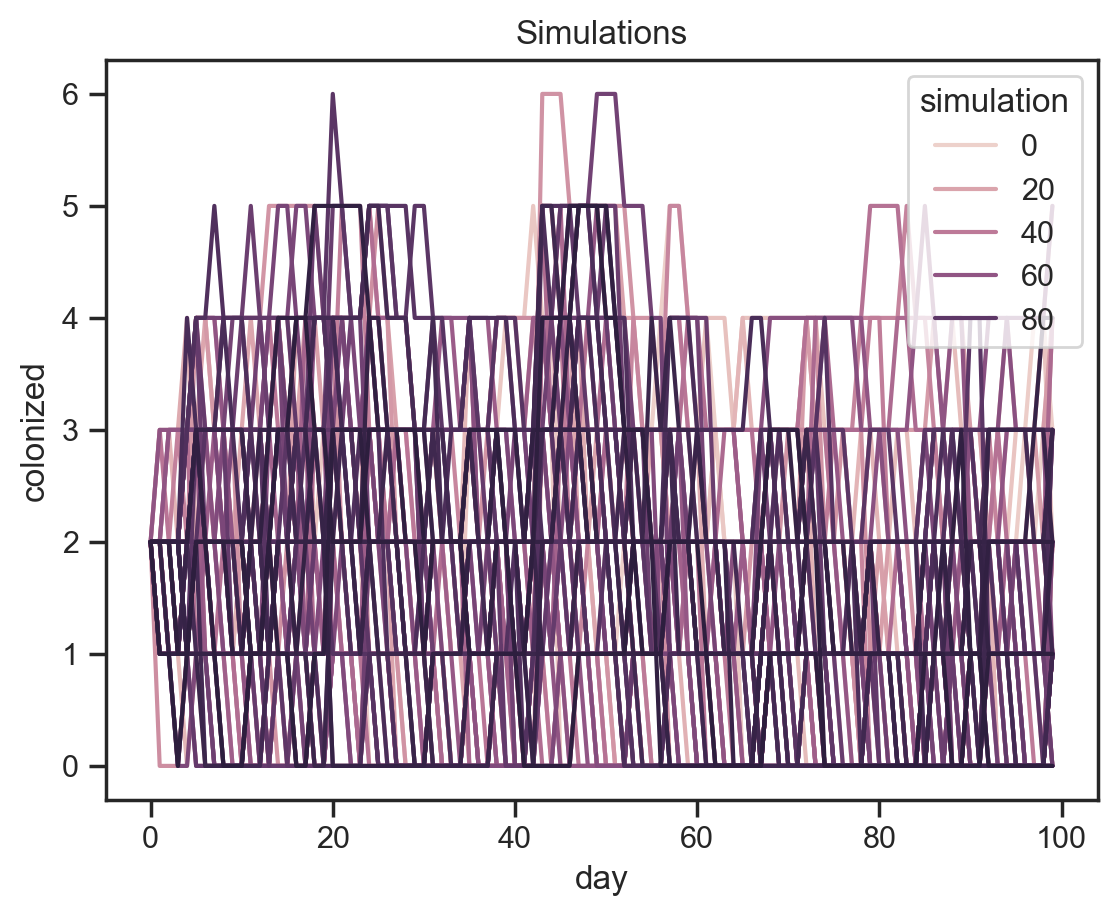

In [5]:
#We can plot the simulation by calculating the total positives and then plotting
total_positive = get_totals(model_simulation)
rel = sns.lineplot(data = total_positive, x = "day", y = "colonized", hue = "simulation").set_title('Simulations')

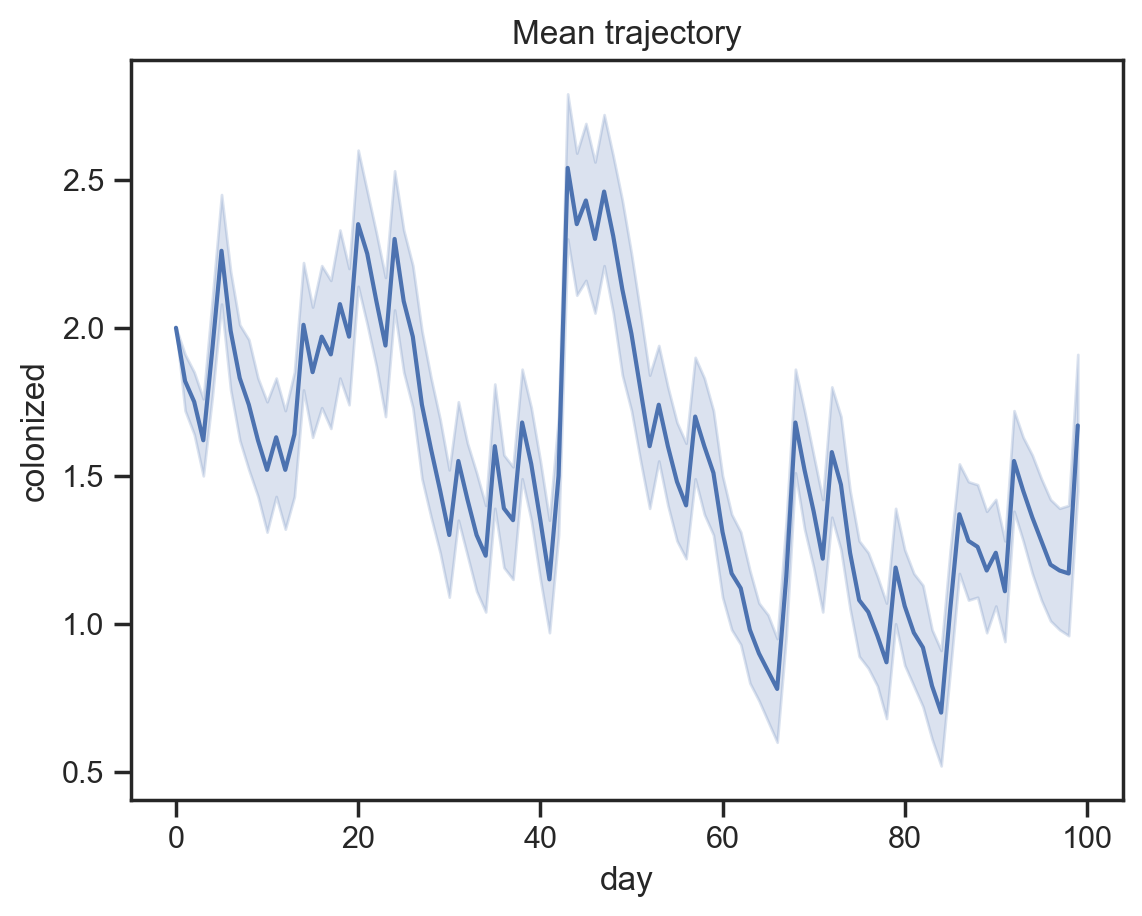

In [6]:
rel = sns.lineplot(data = total_positive, x = "day", y = "colonized").set_title('Mean trajectory')

## Simulate multiple trajectories with multiple parameter combinations
In this section we repeat the excercise but now simulating in parallel 100 trajectories of 4 different parameter combinations

In [7]:
#Random seed
np.random.seed(3245)

nsim = 100      #Number of simulations
num_obs = 7     #Number of patients
num_days = 100  #Run model by 100 days
num_wards = 4   #Total number of wards

#DATA INPUTS (made-up for this example)
#----------------------------------------------------------------
#Simulate the initial number of cases
initial_colonized = np.random.binomial(n=1,p=0.4,size=num_obs) == 1

#Construct a matrix for new arrivals with each row being a different day
new_arrivals = np.empty((num_days, num_obs))

#Simulate the ward-indicator variable
wards = np.empty((num_days, num_obs))

#Simulate the total number of patients per ward
total_patients_per_ward = np.empty((0, 3), dtype = "int")

for day in range(num_days):

    #Generate the data
    new_arrivals_temp = np.random.binomial(n=1,p=0.05,size=7)
    new_arrivals[day,:] = new_arrivals_temp

    wards[day,:] = np.random.randint(1, 4, size = 7)

    minward = 20
    maxward = minward + 25
    total_patients_per_ward_temp = np.random.randint(minward, maxward, size = num_wards)
    total_patients_per_ward_temp = np.column_stack((np.repeat(day, num_wards),
            total_patients_per_ward_temp, np.arange(1, num_wards + 1)))
    total_patients_per_ward = np.append(total_patients_per_ward, total_patients_per_ward_temp, axis = 0)

#Create weights
weights = np.tile(1, new_arrivals.shape)

#PARAMETERS
#----------------------------------------------------------------
#Create the parameters
parameters = numba.typed.Dict()   #<---- THIS ARE THE CHANGES
parameters["alpha"] = np.array([0.1, 0.9, 0.1, 0.9])
parameters["beta"] = np.array([0.4, 0.2, 0.5, 0.2])
parameters["gamma"] = np.linspace(0.5, 0.7, 4)

#RUN MODEL
#----------------------------------------------------------------
#Colonize nextstep
model_simulation = simulate_discrete_model(initial_colonized, wards, total_patients_per_ward, parameters, nsim,
                                            new_arrivals, weights, progress_patients_1_timestep,
                                            progress_patients_probability_ward_1_timestep)

In [8]:
#We can plot the simulation by calculating the total positives and then plotting
total_positive = get_totals(model_simulation, parameters)

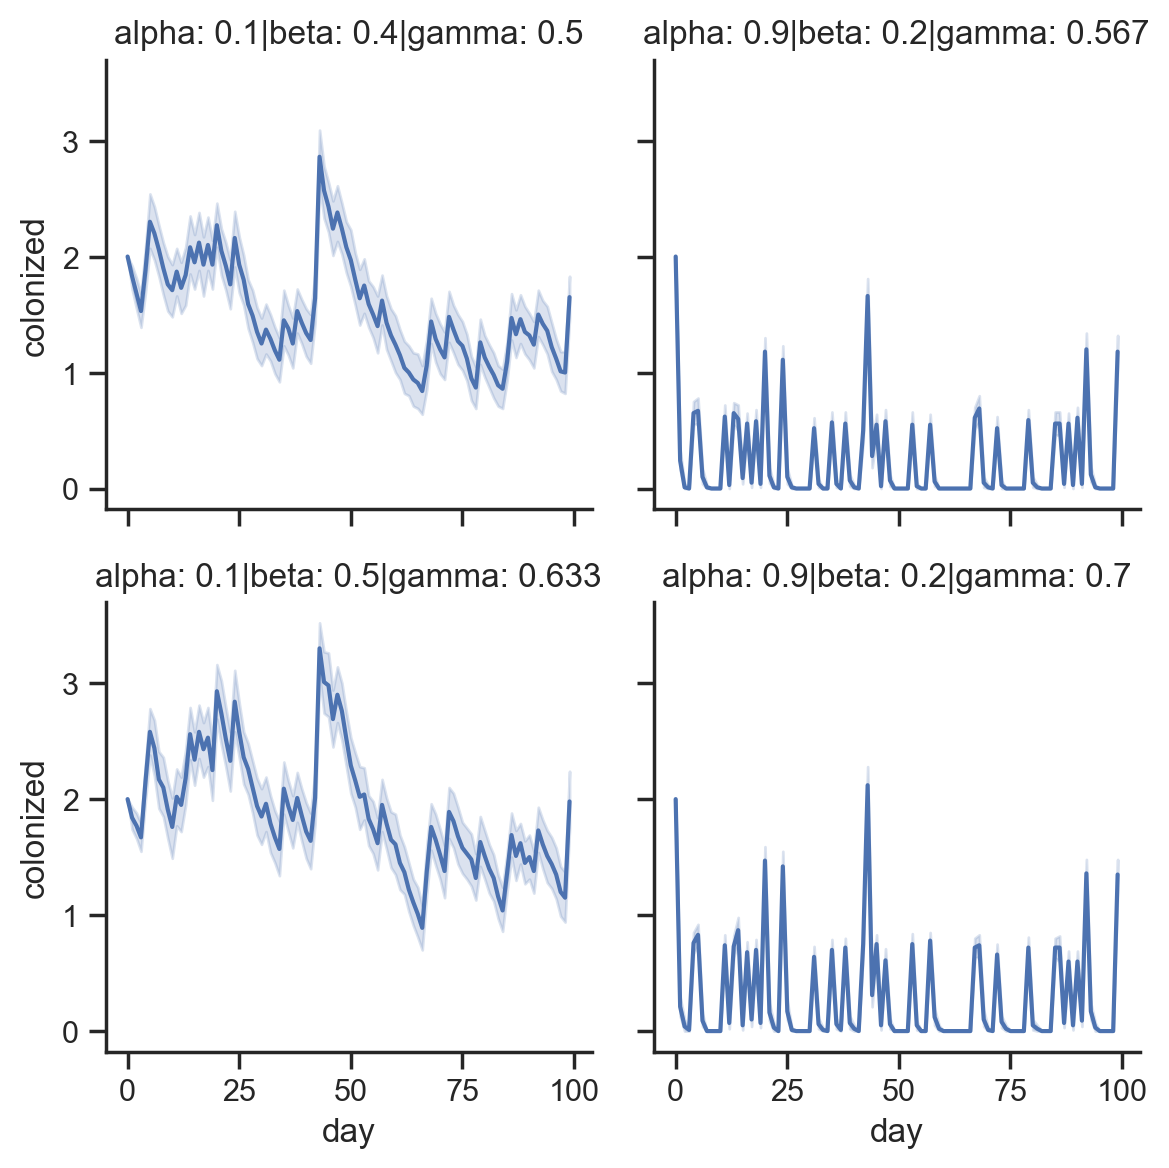

In [9]:
g = sns.FacetGrid(total_positive, col="parameters", col_wrap=2)
g.map(sns.lineplot, "day", "colonized").set_titles(col_template = '{col_name}')